In [1]:
import cv2 
import os 
import glob 
from numpy import asarray
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from skimage.feature import hog
#from skimage import exposure
img_dir = "D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases" # Enter Directory of all images 

data_path = os.path.join(img_dir,'Malignant case*') 
files = glob.glob(data_path) 

data = [] 

original_data=[]
for f1 in files: 
    img = cv2.imread(f1) 
    v=img
    #make all images (512,512)
    img = cv2.resize(img, (224, 224))
    #remove noise
    img = cv2.GaussianBlur(img,(5,5),0)
   
    
    array = asarray(img)
    #see edges 
    img=Image.fromarray((array))
    final= img.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,-1, -1, -1, -1), 1, 0))
    img=final+array  
    img=Image.fromarray((img))
    #img = img.filter(ImageFilter.FIND_EDGES)
    # Convert the image to grayscale
    img = img.convert("L")
    img = asarray(img)
    #segmnation
    ret, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
    #d, img = hog(img, orientations=9 ,pixels_per_cell=(4, 4)
    #                ,cells_per_block=(2, 2), visualize=True)# multichannel=True
    #img = exposure.rescale_intensity(img, in_range=(0, 10)) 
 
    #append in=mage in data
    data.append(img)
    original_data.append(v)
data

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

In [2]:
print(files)

['D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (1).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (10).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (100).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (101).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (102).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (103).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (104).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (105).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (106).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (107).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (108).jpg', 'D:\\dataset_lung_cancer_19_11_2021\\m\\Malignant cases\\Malignant case (109).

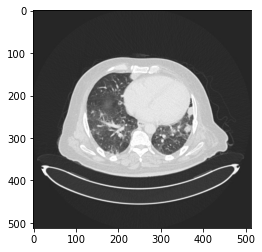

In [3]:
plt.imshow(original_data[10])

In [4]:
img_dir_n = "D:\\dataset_lung_cancer_19_11_2021\\m\\Normal cases" # Enter Directory of all images
data_path_n = os.path.join(img_dir_n,'*g') 
files_n = glob.glob(data_path_n) 
data_n = []
original_data_n=[]
for f2 in files_n: 
    img_n = cv2.imread(f2) 
    
    v_n=img_n
    #make all images (512,512)
    img_n = cv2.resize(img_n, (224, 224))
    #remove noise
    img_n = cv2.GaussianBlur(img_n,(5,5),0)
   
    
    array_n = asarray(img_n)
    #see edges 
    img_n=Image.fromarray((array_n))
    final_n= img_n.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,-1, -1, -1, -1), 1, 0))
    img_n=final_n+array_n  
    img_n=Image.fromarray((img_n))
    #img = img.filter(ImageFilter.FIND_EDGES)
    # Convert the image to grayscale
    img_n = img_n.convert("L")
    img_n = asarray(img_n)
    ret, img_n = cv2.threshold(img_n, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
    #feature extraction using hog
#     d, img_n = hog(img_n, orientations=9 ,pixels_per_cell=(4, 4)
#                    ,cells_per_block=(2, 2), visualize=True)# multichannel=True
#    img_n = exposure.rescale_intensity(img_n, in_range=(0, 10)) 
 
    #append in=mage in data
    data_n.append(img_n)
    original_data_n.append(v_n)
data_n

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

In [5]:
data[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
data_n[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
#lenght of data_n 
x = len(data_n)
x

416

In [8]:
#lenght of data
y = len(data)
y

561

In [9]:
#to make label_normal zeros
label_n=np.zeros(x)
n = len(label_n)
label_n

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
#normal case lenght
n

416

In [11]:
#to make label_Malignantl ones
label=np.ones(y)
m = len(label)
label

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [12]:
# Malignant case lenght
m

561

In [13]:
#concatenate to make general array have all cases normal and Malignant 0/1
genaral_labels=np.concatenate((label,label_n ), axis=None)
genaral_labels[3]

1.0

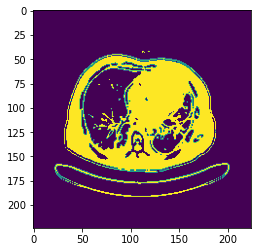

In [14]:
#concatenate to make general array have all cases normal and Malignant images
genaral_data=data+data_n
genaral_data[973]
plt.imshow(genaral_data[0])

In [15]:
o = len(genaral_data)
o

977

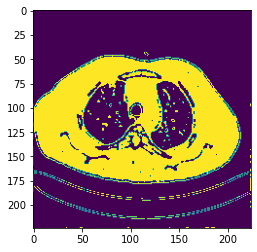

In [16]:
plt.imshow(genaral_data[700])

In [17]:
img.shape

(224, 224)

In [18]:
#make all images (512,512)
#img = cv2.resize(img, (512, 512))

In [19]:
#remove noise
#x = cv2.GaussianBlur(data[0],(5,5),0)
#x

In [20]:
ddepth = cv2.CV_16S
kernel_size = 3
data[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:

#src_gray = cv2.cvtColor(data[0], cv2.COLOR_BGR2GRAY)
#src_gray



In [22]:
#plt.imshow(src_gray)

In [23]:
#dst = cv2.Laplacian(src_gray, ddepth, ksize=kernel_size)
#dst

In [24]:
#plt.imshow(dst)

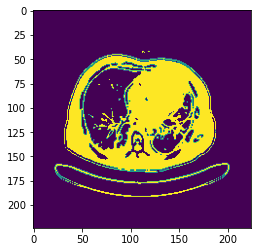

In [25]:
ret, thresh1 = cv2.threshold(data[0], 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
plt.imshow(thresh1)

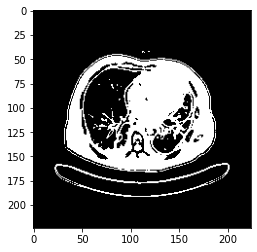

In [26]:
import cv2
import numpy as np

ret, thresh4 = cv2.threshold(data[0], 110, 255, cv2.THRESH_TOZERO)

 
# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images

plt.imshow(thresh4,cmap='gray')


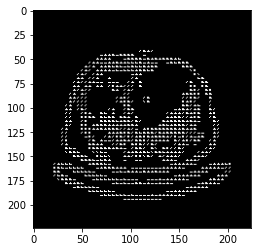

(0.0, 1.0, 0.0, 1.0)

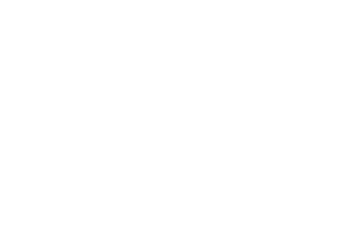

In [27]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

fd, hog_image = hog(data[0], orientations=9 ,pixels_per_cell=(4, 4)
                    ,cells_per_block=(2, 2), visualize=True)# multichannel=True
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray) 

plt.show()
plt.axis("off")
#plt.imshow(hog_image)

In [28]:
x=np.array(genaral_data)
genaral_data=x
x.shape
x[500]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(genaral_data, genaral_labels, test_size=0.2)
print(len(X_train),"train +",len(y_test),"test")

781 train + 196 test


In [30]:
y_train.shape

(781,)

In [31]:
X_train.shape

(781, 224, 224)

In [32]:
genaral_data.shape

(977, 224, 224)

In [33]:
nsamples, nx, ny = X_train.shape
d2_train_x = X_train.reshape((nsamples,nx*ny))
d2_train_x.shape

(781, 50176)

In [34]:
X_train.shape

(781, 224, 224)

In [35]:
X_test.shape

(196, 224, 224)

In [36]:
nsamples, nx, ny = X_test.shape
d2_test = X_test.reshape((nsamples,nx*ny))
d2_test.shape

(196, 50176)

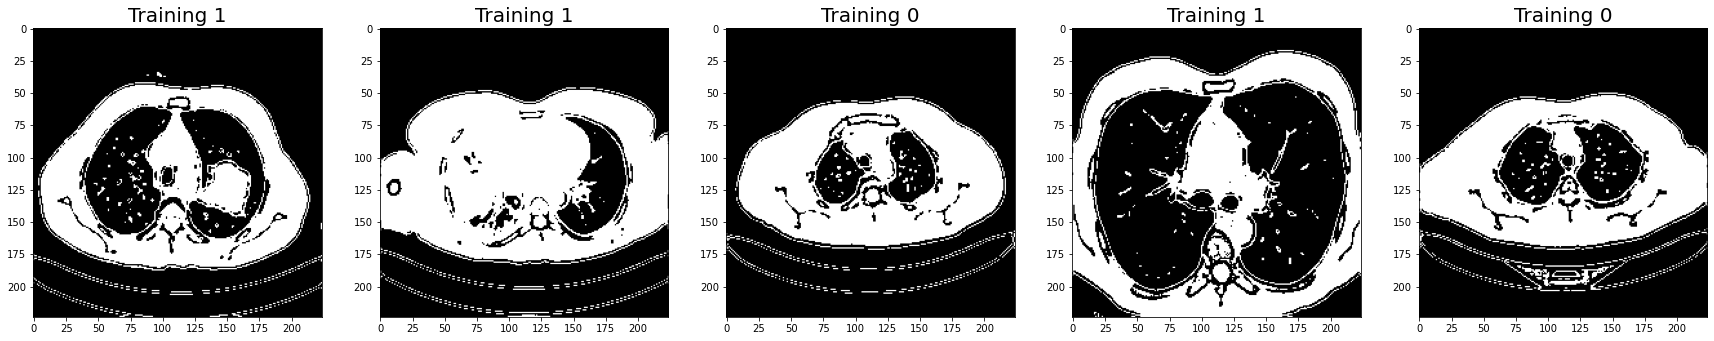

In [37]:
plt.figure(figsize=(30,20))
for index,(genaral_data, genaral_labels) in enumerate(zip(X_train[0:5],y_train[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(genaral_data,(224,224)),cmap='gray')
    plt.title('Training %d' % genaral_labels,fontsize=20)
    plt.plot()

In [40]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(d2_train_x,y_train)

Iteration 1, loss = 13.88597506
Iteration 2, loss = 15.73742166
Iteration 3, loss = 15.73746175
Iteration 4, loss = 12.41863680
Iteration 5, loss = 0.85336766
Iteration 6, loss = 0.74849133
Iteration 7, loss = 0.74964470
Iteration 8, loss = 0.74912145
Iteration 9, loss = 0.74746944
Iteration 10, loss = 0.74497099
Iteration 11, loss = 0.74210823
Iteration 12, loss = 0.73879907
Iteration 13, loss = 0.73552198
Iteration 14, loss = 0.73225908
Iteration 15, loss = 0.72880262
Iteration 16, loss = 0.72561270
Iteration 17, loss = 0.72255971
Iteration 18, loss = 0.71954146
Iteration 19, loss = 0.71643836
Iteration 20, loss = 0.71391511
Iteration 21, loss = 0.71140143
Iteration 22, loss = 0.70913117
Iteration 23, loss = 0.70700694
Iteration 24, loss = 0.70475401
Iteration 25, loss = 0.70308381
Iteration 26, loss = 0.70124901
Iteration 27, loss = 0.69967372
Iteration 28, loss = 0.69826896
Iteration 29, loss = 0.69690422
Iteration 30, loss = 0.69575231
Iteration 31, loss = 0.69475363
Iteration 32,

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [41]:
# Make prediction on test dataset
ypred=clf.predict(d2_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

0.6173469387755102